In [14]:
import omega500analysistools.IO.load_db as load_db
from omega500fitstools.IO.read_Omega500 import *
from scipy.stats.stats import pearsonr   
from scipy.stats import spearmanr
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pylab
from scipy import stats
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats


plt.style.use('~/.matplotlib/stylelib/latexpres.mplstyle')

In [2]:
df_AGN=load_db.return_table('/Users/hqchen/filacf/Omega500/databases/L500_AGN_0.db')

In [45]:
print df_AGN.keys()
df_AGN['mergertree']
allz0id_AGN=(np.unique(df_AGN['mergertree'][df_AGN['mergertree']['parent_aexp']==1.0008]['z0_parent_id'].as_matrix()))

['halos', 'mergertree', 'mergers', 'profiles']


In [46]:
majormerger=np.unique((df_AGN['mergers']['z0_parent_id'][(df_AGN['mergers']['mass_ratio']>0.33)\
                                   &(df_AGN['mergers']['merger_aexp']>0.7)]).as_matrix())
minormajormerger=np.unique((df_AGN['mergers']['z0_parent_id'][(df_AGN['mergers']['mass_ratio']>0.16)\
                                   &(df_AGN['mergers']['merger_aexp']>0.7)]).as_matrix())
moderatemerger=np.array(list(set(minormajormerger)-set(majormerger)))
print moderatemerger
print majormerger


[262  10 267 396 525  17  23  30  31 161 164 299 185 190 451  70 417 456
 463  87 994 504]
[  3   5  13  14  20  21  28  36  42  43  44  59  61  65  69  71  78  82
  96 105 121 123 127 130 132 139 147 154 155 172 183 193 206 214 248 274
 281 283 300 431]


In [47]:
set(allz0id_AGN)-set((np.unique((df_AGN['mergers']['z0_parent_id']))))

{16, 106, 115, 255}

In [48]:
print allz0id_AGN[Gamma==0]


[ 16 106 115 190 255]


In [49]:
df_AGN['profiles']

,T_vw,T_mw,P_vw,P_mw,S_vw,S_mw,U_vw,U_mw,rho,rho2,...,rho_dark,rho_star_bin,rho_star,rho_baryon,rho_total,rho_gas_bulk_bin,M_total_bin,M_total,sigv2,P_rand
0,12050000.0,4564000.0,1.212000e-08,1.042000e-08,0.6125,0.1435,-17170000.0,-18160000.0,1.900000e-23,6.485000e-46,...,1.409560e-23,4.034171e-23,4.034171e-23,3.819703e-23,5.229263e-23,1.895992e-23,9.285100e+12,9.285100e+12,428822.7050,2.710148e-08
1,20360000.0,10190000.0,8.740000e-09,6.220000e-09,1.8350,0.5796,-15770000.0,-16020000.0,6.135000e-24,7.164000e-47,...,1.241924e-23,5.186059e-24,3.364105e-23,3.314618e-23,4.556541e-23,6.578761e-24,4.857900e+11,9.770800e+12,522171.0938,1.145080e-08
2,20680000.0,6146000.0,4.640000e-09,2.802000e-09,2.9800,0.5233,-15540000.0,-15840000.0,5.399000e-24,6.008000e-47,...,1.113185e-23,4.415643e-24,2.807064e-23,2.891532e-23,4.004717e-23,5.309606e-24,5.713600e+11,1.034220e+13,449136.8069,7.949132e-09
3,19270000.0,5660000.0,3.342000e-09,2.297000e-09,3.5010,0.5635,-15260000.0,-15550000.0,4.223000e-24,3.973000e-47,...,9.921845e-24,3.109120e-24,2.331293e-23,2.500577e-23,3.492761e-23,4.462405e-24,5.488900e+11,1.089110e+13,453771.2548,6.749704e-09
4,24060000.0,6287000.0,2.659000e-09,1.377000e-09,5.4580,0.8725,-14980000.0,-15190000.0,3.024000e-24,2.180000e-47,...,8.774808e-24,2.695394e-24,1.938310e-23,2.137090e-23,3.014571e-23,2.971460e-24,5.363300e+11,1.142750e+13,531790.5745,5.267316e-09
5,24580000.0,5882000.0,1.985000e-09,9.740000e-10,7.6470,0.9908,-14740000.0,-14910000.0,2.413000e-24,1.467000e-47,...,7.758775e-24,1.979278e-24,1.606587e-23,1.822147e-23,2.598025e-23,2.413039e-24,5.437400e+11,1.197110e+13,463377.4082,3.727160e-09
6,26090000.0,3673000.0,1.033000e-09,3.547000e-10,14.1400,0.9628,-14490000.0,-14690000.0,2.011000e-24,1.077000e-47,...,6.879870e-24,1.746085e-24,1.333664e-23,1.551228e-23,2.239215e-23,2.029291e-24,5.902300e+11,1.256150e+13,372030.7541,2.516528e-09
7,31940000.0,2925000.0,6.676000e-10,1.525000e-10,23.7600,1.2000,-14240000.0,-14430000.0,1.632000e-24,7.827000e-48,...,5.990514e-24,1.217531e-24,1.102665e-23,1.317062e-23,1.916114e-23,1.557494e-24,5.335400e+11,1.309490e+13,327158.4133,1.698491e-09
8,37190000.0,2506000.0,4.450000e-10,7.702000e-11,40.4400,1.4850,-13990000.0,-14110000.0,1.270000e-24,4.877000e-48,...,5.229782e-24,1.104874e-24,9.135633e-24,1.115953e-23,1.638931e-23,1.241730e-24,5.767500e+11,1.367160e+13,282942.1114,1.171125e-09
9,44830000.0,2301000.0,3.302000e-10,4.479000e-11,61.7600,1.9000,-13750000.0,-13880000.0,1.026000e-24,3.443000e-48,...,4.574476e-24,7.715571e-25,7.541391e-24,9.418651e-24,1.399313e-23,1.054556e-24,5.771700e+11,1.424880e+13,238031.9570,8.367270e-10


In [50]:
allz0id_AGN
outclid=[]
outr500c=[]
outM500c=[]
outMgas500c=[]
for clid in allz0id_AGN:
    outclid.append(clid)
    outr500c.append(float(df_AGN['halos']['r500c']\
                [(df_AGN['halos']['id']==clid)&(df_AGN['halos']['aexp']==1.0008)]))
    outM500c.append(float(df_AGN['halos']['M_total_500c']\
                [(df_AGN['halos']['id']==clid)&(df_AGN['halos']['aexp']==1.0008)]))
    outMgas500c.append(float(df_AGN['halos']['M_gas_500c']\
                [(df_AGN['halos']['id']==clid)&(df_AGN['halos']['aexp']==1.0008)]))

In [51]:
print len(outr500c)

97


In [8]:
print allz0id_AGN==icl

NameError: name 'icl' is not defined

In [52]:
import pandas as pd
smt=pd.read_csv('../data/SMT_AGN.csv') 

def calc_Gamma(acutGamma=0.7,Mdef='M_total_200m'):
    print 'default definition is M_total_200m'
    Gamma=[]
    ia=int(40-40*acutGamma)
    for CLid in allz0id:
        if len(groupbyz0id.get_group(CLid).iloc[:])<25:
            Gamma.append(0)
        else:
            group=groupbyz0id.get_group(CLid).iloc[0:25]

            nom=(np.log10(group[Mdef].iloc[0])-np.log10(group[Mdef].iloc[ia]))
            denom=(np.log10(group['aexp'].iloc[0])-np.log10(group['aexp'].iloc[ia]))
            Gamma.append(nom/denom)
    return np.array(Gamma)

In [53]:
znow=1.0008
allz0id=allz0id_AGN
groupbyz0id=smt.groupby('z0_parent_id')
Gamma=calc_Gamma()

default definition is M_total_200m


### load observable

In [54]:
icl,Lxbulk=np.loadtxt('../data/Lxbulklist_tot_AGN.txt',unpack=True)
icl,Txbulk=np.loadtxt('../data/Txbulklist_tot_AGN.txt',unpack=True)

# icl,Lx=np.loadtxt('../data/Lxlist_tot_AGN.txt',unpack=True)
# icl,Tx=np.loadtxt('../data/Txlist_tot_AGN.txt',unpack=True)



# cl,r,m,Lxbulk,Txbulk,mg,yx=np.loadtxt('../data/NR_mass_observables_a1.0005.txt',unpack=True)


### Filter out halo with no Gamma info

In [55]:
print len(Gamma)
print len(outM500c)

97
97


In [56]:
allz0id_AGN_92=allz0id_AGN[Gamma>0]
Lxbulk_92=Lxbulk[Gamma>0]
Txbulk_92=Txbulk[Gamma>0]
outr500c_92=np.array(outr500c)[Gamma>0]
outM500c_92=np.array(outM500c)[Gamma>0]
outMgas500c_92=np.array(outMgas500c)[Gamma>0]

In [67]:
from mcmc_fitline import *

def plot_obs(x,y,xlabel,ylabel,mcmc=True,fixedslope=None,savefig=None,retDeltay=False,\
            plotbestfit=True,xlim=None,ylim=None):
    slope, intercept, r_value, p_value, std_err = \
            stats.linregress(x,y)
    if fixedslope!=None:
        intercept=np.mean(y-fixedslope*x)
        slope=fixedslope
    if mcmc==True:
        print slope, intercept
        if fixedslope==None:
            m,c,s=run_fit(x,0*np.zeros_like(x),y,0*np.zeros_like(y),\
                      m0=slope,c0=intercept,s0=0.1,\
                      ipar_active=np.array([1, 1, 1]),\
                      modelpdf=line_fit_vert_like)
            pstats(m);pstats(c);pstats(s);
            slope=(np.array(m)).mean()
            intercept=(np.array(c)).mean()
        else: 
            m, c,s=run_fit(x,0*np.zeros_like(x),y,0*np.zeros_like(y),\
                      m0=fixedslope,c0=intercept,s0=0.1,\
                      ipar_active=np.array([0, 1, 1]),\
                      modelpdf=line_fit_vert_like)
            pstats(m);pstats(c);pstats(s);
            intercept=(np.array(c)).mean()

    print slope, intercept
    sx=np.copy(x)
    sx.sort()
    plt.figure(figsize=(10,9))
    if plotbestfit==True:
        plt.plot(sx,sx*slope+intercept)
    for icl,clno in enumerate(allz0id_AGN_92):
        if clno in majormerger:
            plt.scatter(x[icl],y[icl],marker='v',c='r',s=40,alpha=0.5)
        elif clno in moderatemerger:
            plt.scatter(x[icl],y[icl],s=40,c='yellow',alpha=0.5)
        else:
            plt.scatter(x[icl],y[icl],s=40,c='b',alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xlim!=None:
        plt.xlim(xlim)
    if ylim!=None:
        plt.ylim(ylim)
    if savefig!=None:
        plt.savefig(savefig)
    plt.show()
    if retDeltay==True:
        fx=x*slope+intercept
        return y-fx
    

In [68]:
# def run_fit(x, ex, y, ey, nwalkers=100, m0=None, c0=None, s0= None, 
#             ipar_active=None, modelpdf=line_fit_like):
#     """
#     run MCMC sampling of the posterior and extract fit parameters from the chain
#     """

#     chain, Rval, nthin = mcmc_fit(x, y, ex, ey, pini=[m0, c0, s0], 
#                                   ipar_active=ipar_active, nwalkers=nwalkers, 
#                                   modelpdf=modelpdf)

#     nburn = int(20*nwalkers*nthin)
#     print ipar_active
#     if ipar_active[0]==1:
#         m = zip(*chain)[0]; c = zip(*chain)[1]; s = np.sqrt(zip(*chain)[2])
#         mc = m[nburn:]; cc = c[nburn:]; sc = s[nburn:]
        
#     elif ipar_active[0]==0:
#         m= m0; c = zip(*chain)[0]; s = np.sqrt(zip(*chain)[1])
#         mc= m; cc = c[nburn:]; sc = s[nburn:]
#     return mc, cc, sc

### Compare to Fabjan+12

0.555794306491 -18.0580557882
starting sampling with 3 active parameters of the total 3 parameters
nchain = 500; tcorr = 1.51e+01
('R_GR = ', array([ 1.20172986,  1.17421952,  1.00417646]))
nchain = 1000; tcorr = 1.53e+01
('R_GR = ', array([ 1.07440277,  1.06871595,  1.00204513]))
nchain = 1500; tcorr = 1.49e+01
('R_GR = ', array([ 1.04091311,  1.03872725,  1.00153346]))
nchain = 2000; tcorr = 6.21e+01
('R_GR = ', array([ 1.02997272,  1.02846533,  1.00119341]))
nchain = 2500; tcorr = 6.04e+01
('R_GR = ', array([ 1.01904011,  1.01804753,  1.00098969]))
nchain = 3000; tcorr = 6.05e+01
('R_GR = ', array([ 1.01396708,  1.01335774,  1.00081345]))
nchain = 3500; tcorr = 5.93e+01
('R_GR = ', array([ 1.01188789,  1.01147099,  1.00070332]))
nchain = 4000; tcorr = 5.85e+01
('R_GR = ', array([ 1.01062211,  1.01031282,  1.00058812]))
nchain = 4500; tcorr = 5.85e+01
('R_GR = ', array([ 1.00897736,  1.00868049,  1.00050606]))
MCMC sampler generated 450000 samples using 100 walkers
with step acceptan

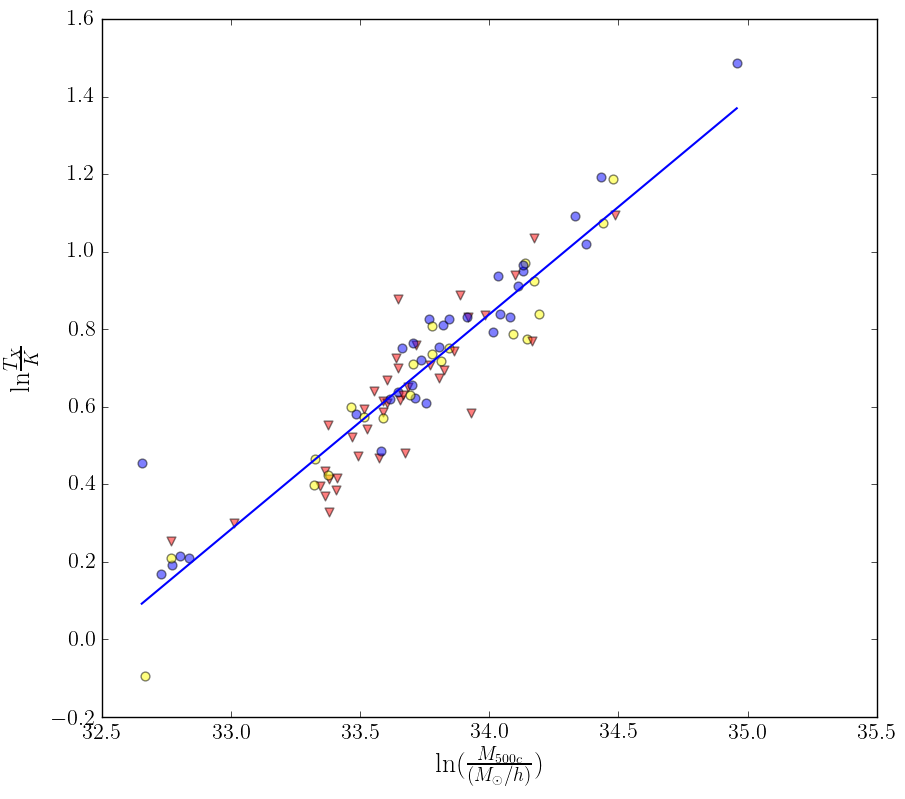

0.666666666667 -21.7940693874
starting sampling with 2 active parameters of the total 3 parameters
nchain = 500; tcorr = 1.32e+01
('R_GR = ', array([ 0.99664289,  1.00389851]))
MCMC sampler generated 50000 samples using 100 walkers
with step acceptance ratio of 0.625
[0 1 1]
mean, median = 0.667, 0.667, st.dev=0.0000
68perc interval = 0.667, 0.667
95perc interval = 0.667, 0.667
----------------------------------------------
mean, median = -21.794, -21.794, st.dev=0.0103
68perc interval = -21.804, -21.784
95perc interval = -21.814, -21.774
----------------------------------------------
mean, median = 0.103, 0.102, st.dev=0.0079
68perc interval = 0.095, 0.110
95perc interval = 0.089, 0.120
----------------------------------------------
0.666666666667 -21.7941523271


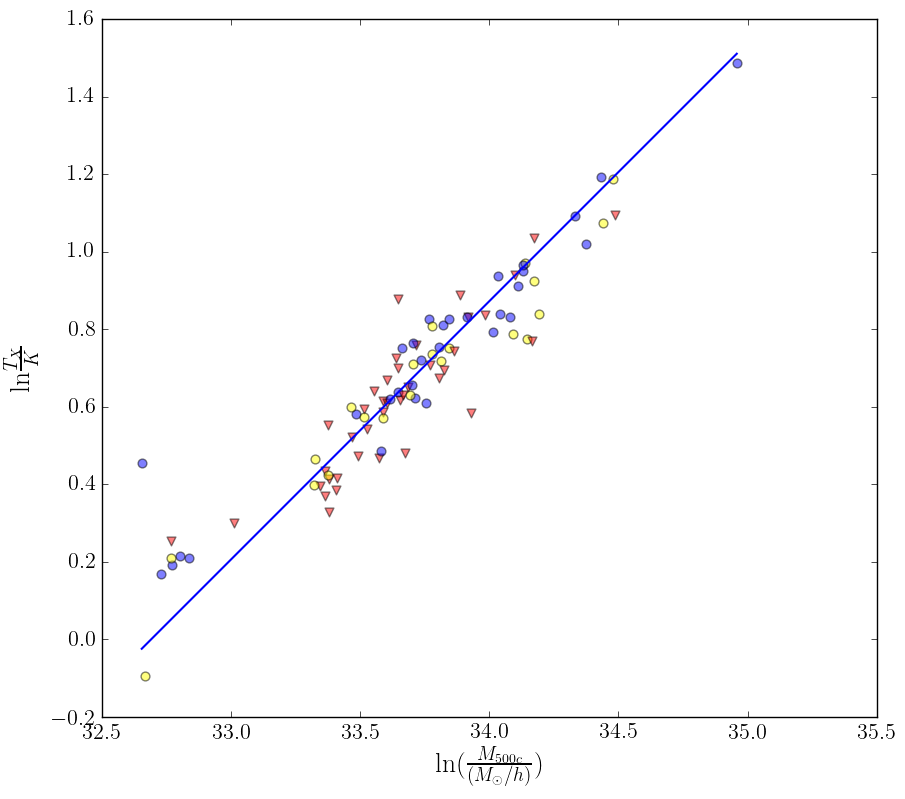

In [78]:
x=np.log(outM500c_92)
TKpivot=3*1.16e7
y=np.log(Txbulk_92/TKpivot)

xlabel=r'${\rm ln} (\frac{M_{500c}}{(M_\odot/h)})$'
ylabel=r'${\rm ln} \frac{T_{X}}{K}$'
dTx=plot_obs(x,y,xlabel,ylabel,savefig='Tx_M500c_AGN.png',retDeltay=True)
dTx_fs=plot_obs(x,y,xlabel,ylabel,fixedslope=2./3.,savefig='Tx_M500c_AGN.png',retDeltay=True)

-0.0101965441058 0.0234995313425
starting sampling with 3 active parameters of the total 3 parameters
nchain = 500; tcorr = 8.20e+00
('R_GR = ', array([ 1.06785632,  1.05645273,  1.01064093]))
nchain = 1000; tcorr = 3.30e+01
('R_GR = ', array([ 1.03437626,  1.03403437,  1.00502052]))
nchain = 1500; tcorr = 3.23e+01
('R_GR = ', array([ 1.02189301,  1.0234228 ,  1.00374688]))
nchain = 2000; tcorr = 3.12e+01
('R_GR = ', array([ 1.01652768,  1.01664457,  1.00307131]))
nchain = 2500; tcorr = 3.10e+01
('R_GR = ', array([ 1.01321622,  1.01420945,  1.00253715]))
nchain = 3000; tcorr = 3.08e+01
('R_GR = ', array([ 1.0119202 ,  1.01226316,  1.00208256]))
nchain = 3500; tcorr = 3.08e+01
('R_GR = ', array([ 1.01094018,  1.0112865 ,  1.00176174]))
nchain = 4000; tcorr = 3.04e+01
('R_GR = ', array([ 1.00991748,  1.01027249,  1.00157885]))
nchain = 4500; tcorr = 3.05e+01
('R_GR = ', array([ 1.0079511 ,  1.00846663,  1.0014421 ]))
MCMC sampler generated 450000 samples using 100 walkers
with step accep

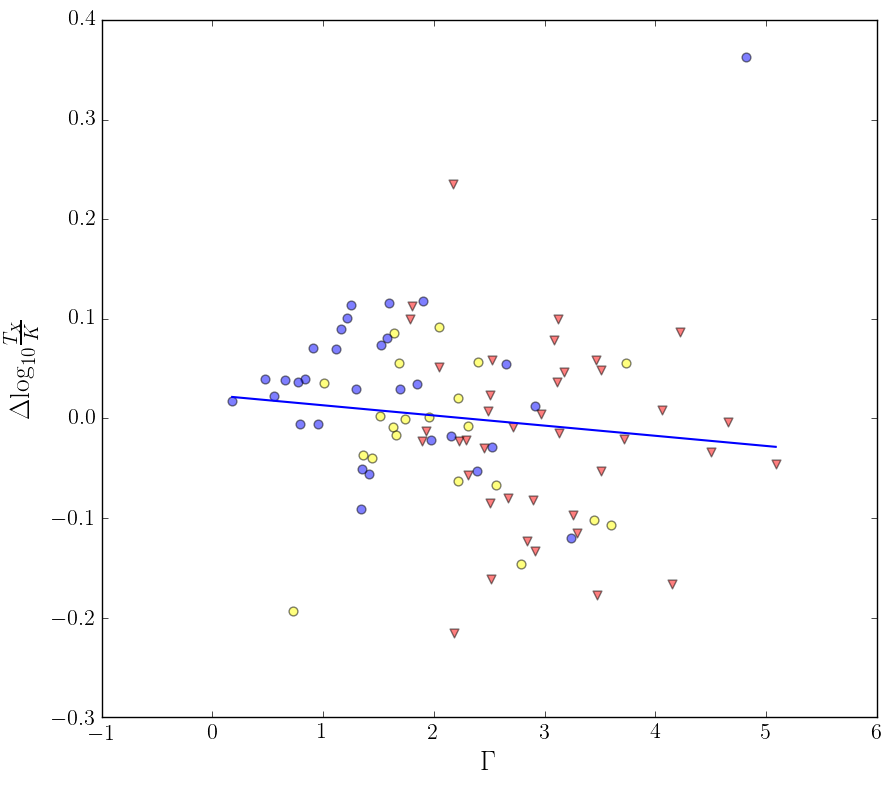

In [84]:
x=Gamma[Gamma>0]
y=dTx
xlabel=r'$\Gamma$'
ylabel=r'$\Delta {\rm log}_{10}\frac{T_{X}}{K}$'
plot_obs(x,y,xlabel,ylabel,savefig='Gamma_DTx_AGN.png')

1.08630476253 -4.88857155395
starting sampling with 3 active parameters of the total 3 parameters
nchain = 500; tcorr = 1.43e+01
('R_GR = ', array([ 0.98313672,  1.06605227,  1.00436195]))
nchain = 1000; tcorr = 1.45e+01
('R_GR = ', array([ 0.986968  ,  1.03234601,  1.00206986]))
nchain = 1500; tcorr = 1.41e+01
('R_GR = ', array([ 0.98767424,  1.02123388,  1.00131154]))
nchain = 2000; tcorr = 5.80e+01
('R_GR = ', array([ 0.98711782,  1.01654927,  1.00096592]))
nchain = 2500; tcorr = 5.64e+01
('R_GR = ', array([ 0.98545373,  1.01317618,  1.00075001]))
nchain = 3000; tcorr = 5.65e+01
('R_GR = ', array([ 0.98316293,  1.01091852,  1.0006219 ]))
nchain = 3500; tcorr = 5.54e+01
('R_GR = ', array([ 0.97845349,  1.00940218,  1.00054641]))
nchain = 4000; tcorr = 5.47e+01
('R_GR = ', array([ 0.97212226,  1.00787157,  1.00045805]))
nchain = 4500; tcorr = 5.48e+01
('R_GR = ', array([ 0.95626993,  1.00688433,  1.00040704]))
nchain = 5000; tcorr = 5.42e+01
('R_GR = ', array([ 0.88496647,  1.00584734

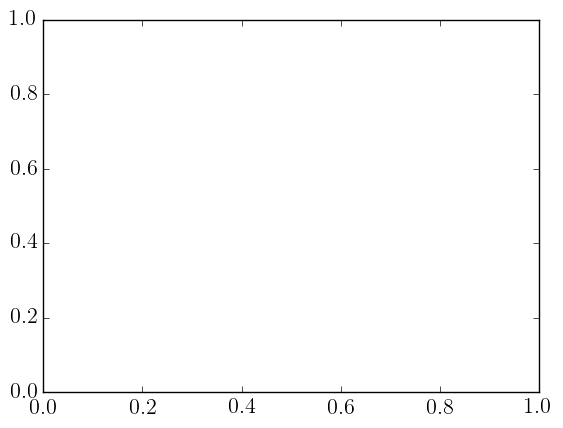

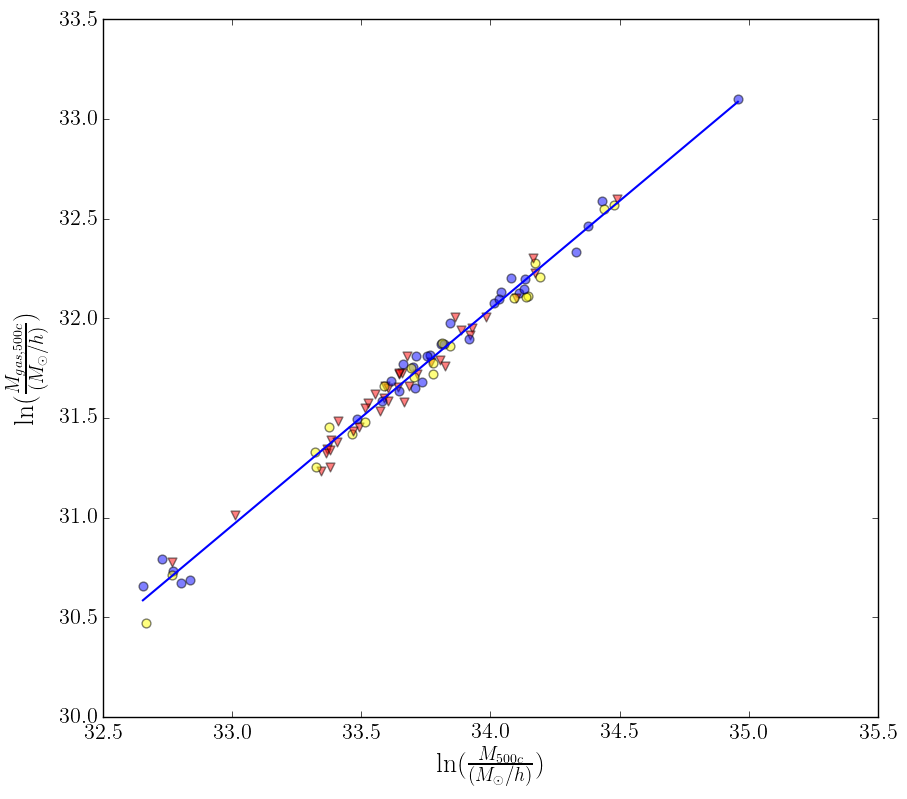

1.0 -1.98040069901
starting sampling with 2 active parameters of the total 3 parameters
nchain = 500; tcorr = 1.07e+01
('R_GR = ', array([ 0.99443143,  1.00507249]))
MCMC sampler generated 50000 samples using 100 walkers
with step acceptance ratio of 0.619
[0 1 1]
mean, median = 1.000, 1.000, st.dev=0.0000
68perc interval = 1.000, 1.000
95perc interval = 1.000, 1.000
----------------------------------------------
mean, median = -1.980, -1.980, st.dev=0.0072
68perc interval = -1.987, -1.973
95perc interval = -1.995, -1.966
----------------------------------------------
mean, median = 0.070, 0.070, st.dev=0.0053
68perc interval = 0.065, 0.075
95perc interval = 0.060, 0.082
----------------------------------------------
1.0 -1.98039228818


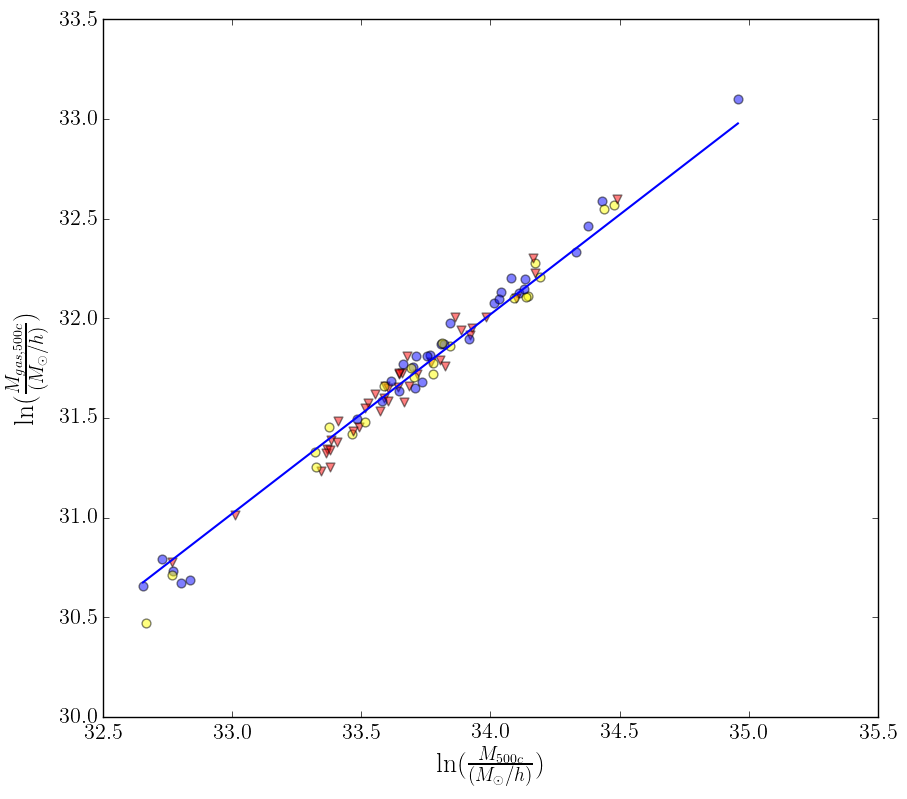

In [74]:
x=np.log(outM500c_92)
y=np.log(outMgas500c_92)
xlabel=r'${\rm ln} (\frac{M_{500c}}{(M_\odot/h)})$'
ylabel=r'${\rm ln} (\frac{M_{gas,500c}}{(M_\odot/h)})$'
dMg=plot_obs(x,y,xlabel,ylabel,savefig='Mg_M500c_AGN.png',retDeltay=True)
dMg_fs=plot_obs(x,y,xlabel,ylabel,fixedslope=1.,savefig='Mg_M500c_AGN.png',retDeltay=True)

0.221217366452 1.4749835839e-05
starting sampling with 3 active parameters of the total 3 parameters
nchain = 500; tcorr = 6.91e+00
('R_GR = ', array([ 1.06127368,  1.06616363,  1.00858673]))
nchain = 1000; tcorr = 2.78e+01
('R_GR = ', array([ 1.0362833 ,  1.02840932,  1.00449599]))
nchain = 1500; tcorr = 2.71e+01
('R_GR = ', array([ 1.02198616,  1.02147931,  1.00292359]))
nchain = 2000; tcorr = 2.63e+01
('R_GR = ', array([ 1.01845795,  1.01460913,  1.00204224]))
nchain = 2500; tcorr = 2.62e+01
('R_GR = ', array([ 1.01545079,  1.01177121,  1.00154676]))
nchain = 3000; tcorr = 2.61e+01
('R_GR = ', array([ 1.01174232,  1.01026218,  1.00135898]))
nchain = 3500; tcorr = 2.60e+01
('R_GR = ', array([ 1.00999868,  1.00931297,  1.00117665]))
MCMC sampler generated 350000 samples using 100 walkers
with step acceptance ratio of 0.563
[1 1 1]
mean, median = 0.206, 0.205, st.dev=0.1543
68perc interval = 0.058, 0.356
95perc interval = -0.101, 0.516
----------------------------------------------
mea

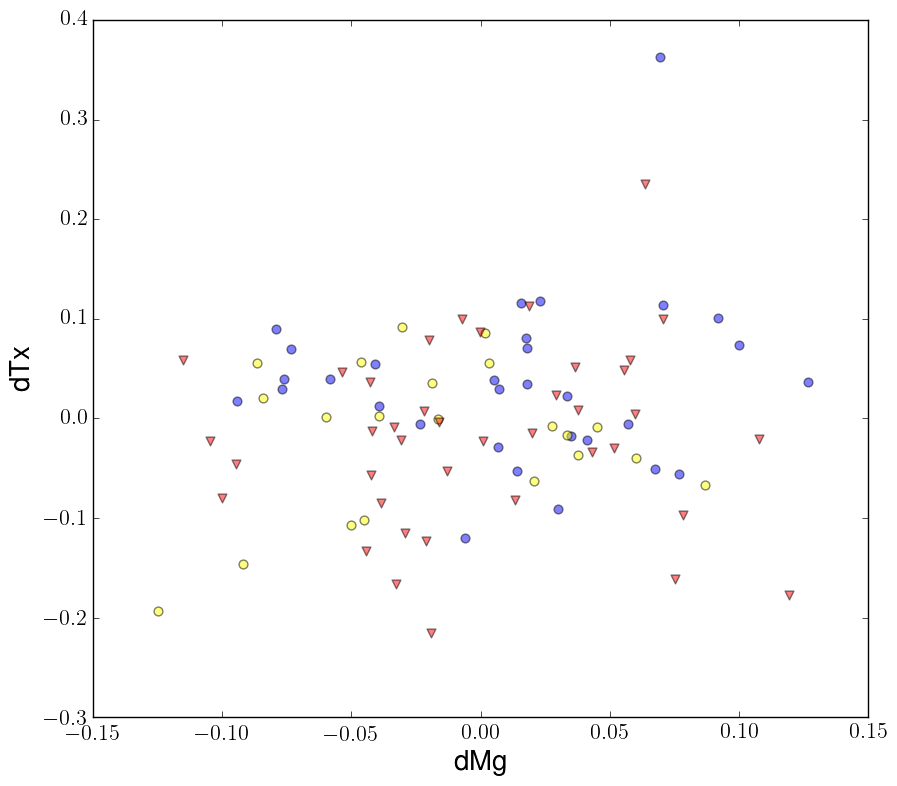

array([ -7.20952652e-03,   8.27492004e-02,   2.78803746e-02,
        -7.17023658e-02,  -1.80093795e-02,   1.01206721e-01,
         8.25991730e-02,   8.53166693e-02,   1.06416224e-01,
        -4.03391203e-02,  -4.08553514e-03,   3.22325692e-03,
        -2.11016802e-01,  -9.66207781e-02,  -1.26899556e-01,
         2.02855137e-02,  -2.95954716e-02,  -4.97387658e-02,
         8.73888209e-02,  -1.08608140e-01,   3.75233903e-02,
         3.78552494e-02,   4.55721858e-02,   8.48127282e-02,
         1.12872514e-01,  -4.19903560e-02,   4.55539582e-02,
        -2.25487954e-02,   6.15294157e-05,   6.67318668e-02,
         4.69062700e-02,   3.69498716e-02,  -1.59186119e-01,
        -8.45781208e-02,  -5.57655644e-02,   1.13402177e-01,
         7.40893920e-02,   4.44527138e-02,  -1.40240316e-03,
        -6.57392785e-05,   1.78991586e-02,   1.57573560e-02,
        -1.76769316e-01,   1.21427682e-02,  -7.62879957e-02,
         5.81383093e-02,  -3.02141365e-02,  -2.41486240e-02,
        -5.85717365e-02,

In [79]:
plot_obs(dMg,dTx,'dMg','dTx',plotbestfit=False,savefig='dMgdTx.png',retDeltay=True)

-0.228187520097 8.10204897756e-05
starting sampling with 3 active parameters of the total 3 parameters
nchain = 500; tcorr = 7.58e+00
('R_GR = ', array([ 1.07976601,  1.05994146,  1.00731678]))
nchain = 1000; tcorr = 3.04e+01
('R_GR = ', array([ 1.04413685,  1.03031217,  1.0036203 ]))
nchain = 1500; tcorr = 2.97e+01
('R_GR = ', array([ 1.02658955,  1.0195282 ,  1.0023869 ]))
nchain = 2000; tcorr = 2.89e+01
('R_GR = ', array([ 1.01980438,  1.01497139,  1.00193332]))
nchain = 2500; tcorr = 2.86e+01
('R_GR = ', array([ 1.01538488,  1.01320323,  1.00155956]))
nchain = 3000; tcorr = 2.84e+01
('R_GR = ', array([ 1.01042575,  1.01041827,  1.00146789]))
nchain = 3500; tcorr = 2.83e+01
('R_GR = ', array([ 1.00963283,  1.00909544,  1.00143862]))
MCMC sampler generated 350000 samples using 100 walkers
with step acceptance ratio of 0.565
[1 1 1]
mean, median = -0.212, -0.213, st.dev=0.1454
68perc interval = -0.352, -0.071
95perc interval = -0.501, 0.080
--------------------------------------------

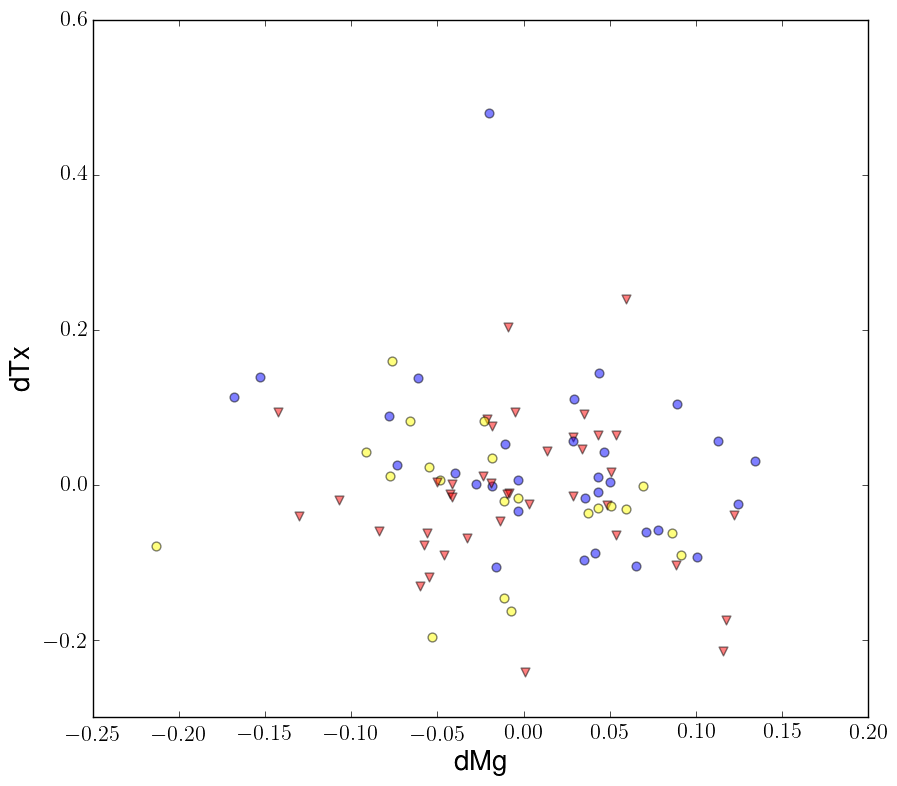

array([ 0.02755767,  0.06414002,  0.05044221, -0.04109807, -0.04384546,
        0.05335983,  0.07217908,  0.01298161,  0.07226603, -0.01517577,
       -0.02083042, -0.01774071, -0.24107726, -0.1642329 , -0.2076457 ,
       -0.03500677, -0.09045702, -0.02451915,  0.09233476, -0.08982637,
        0.07376056, -0.00076394,  0.00960715, -0.00528718,  0.00148344,
       -0.0082238 ,  0.00669342, -0.01216436, -0.01372138,  0.0687602 ,
        0.07558648,  0.07751916, -0.14350306, -0.04982461, -0.0796309 ,
        0.11650153, -0.00350667,  0.06819834, -0.00713087, -0.0053975 ,
        0.04688363,  0.01925663, -0.18933857, -0.02409164, -0.07351422,
       -0.00212292, -0.04541619, -0.01010271, -0.06763125,  0.05953388,
        0.06299129,  0.08096016,  0.08005352,  0.2011467 , -0.13044421,
       -0.01817861,  0.07743538, -0.09003086, -0.08434338, -0.07589689,
       -0.02051837, -0.05397188,  0.09926774,  0.0526878 , -0.07738364,
       -0.0418093 ,  0.00639897, -0.11001381, -0.07125089, -0.14

In [80]:
plot_obs(dMg_fs,dTx_fs,'dMg','dTx',plotbestfit=False,savefig='dMgdTx.png',retDeltay=True)

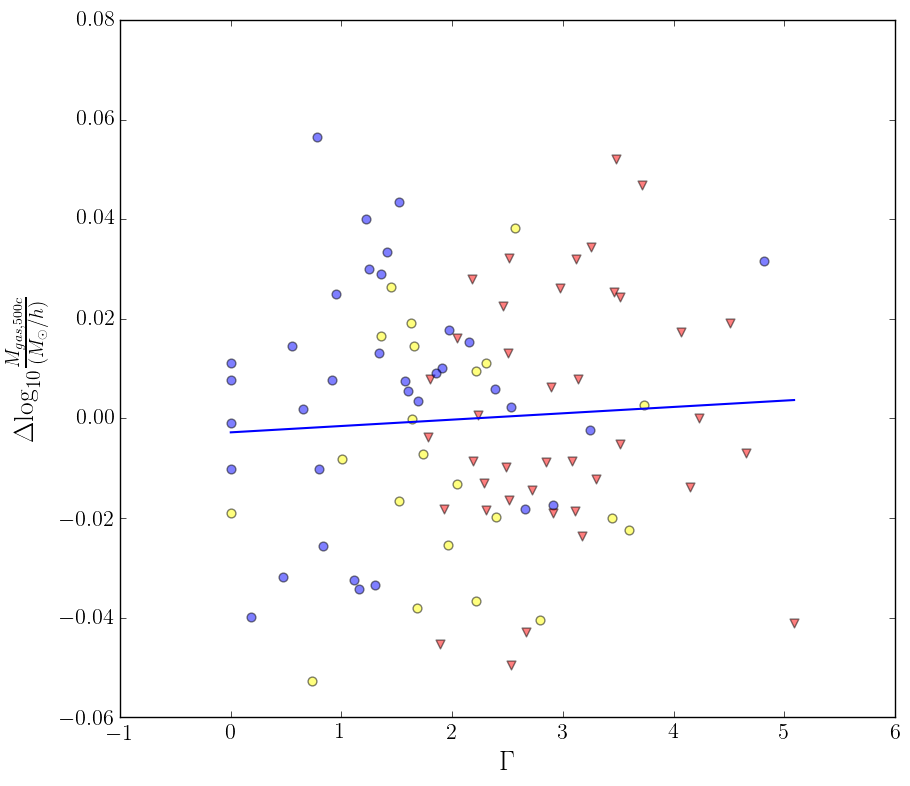

In [177]:
x=Gamma
y=dMg
xlabel=r'$\Gamma$'
ylabel=r'$\Delta {\rm log}_{10}\frac{M_{gas,500c}}{(M_\odot/h)}$'
plot_obs(x,y,xlabel,ylabel,savefig='Gamma_DMg_AGN.png')

In [182]:
dTx

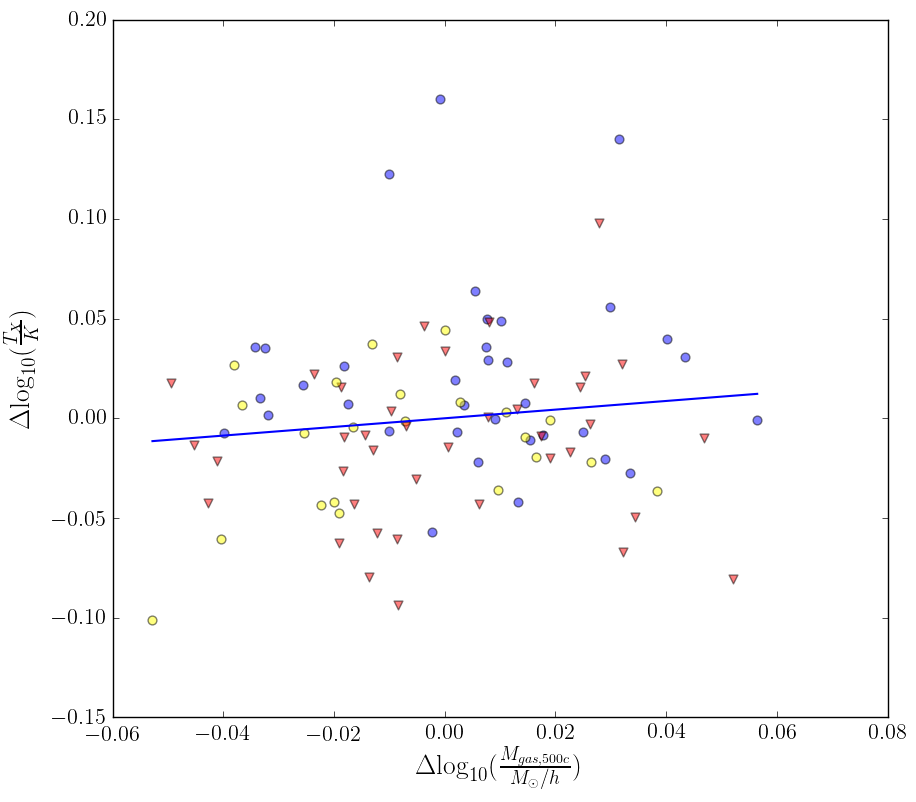

In [189]:
x=dMg
y=dTx

xlabel=r'$\Delta {\rm log}_{10} (\frac{M_{gas,500c}}{M_\odot/h})$'
ylabel=r'$\Delta {\rm log}_{10}(\frac{T_{X}}{K})$'
plot_obs(x,y,xlabel,ylabel,savefig='DMg_DTx_AGN.png')

0.59425029962 4.13166172199
starting sampling with 3 active parameters of the total 3 parameters
nchain = 500; tcorr = 1.48e+01
('R_GR = ', array([ 0.95301289,  1.06086665,  1.0044013 ]))
nchain = 1000; tcorr = 1.50e+01
('R_GR = ', array([ 0.96067646,  1.02670392,  1.00200703]))
nchain = 1500; tcorr = 1.46e+01
('R_GR = ', array([ 0.94650593,  1.01909176,  1.00133197]))
nchain = 2000; tcorr = 6.06e+01
('R_GR = ', array([ 0.89506896,  1.01450708,  1.0009765 ]))
nchain = 2500; tcorr = 5.88e+01
('R_GR = ', array([ 1.66155506,  1.01273596,  1.00079036]))
nchain = 3000; tcorr = 5.89e+01
('R_GR = ', array([ 1.08573225,  1.01171246,  1.00069299]))
nchain = 3500; tcorr = 5.78e+01
('R_GR = ', array([ 1.04745705,  1.01086636,  1.00060842]))
nchain = 4000; tcorr = 5.70e+01
('R_GR = ', array([ 1.02741602,  1.00832612,  1.00053292]))
nchain = 4500; tcorr = 5.71e+01
('R_GR = ', array([ 1.02332668,  1.00859814,  1.0004697 ]))
nchain = 5000; tcorr = 5.64e+01
('R_GR = ', array([ 1.0174102 ,  1.00726549,

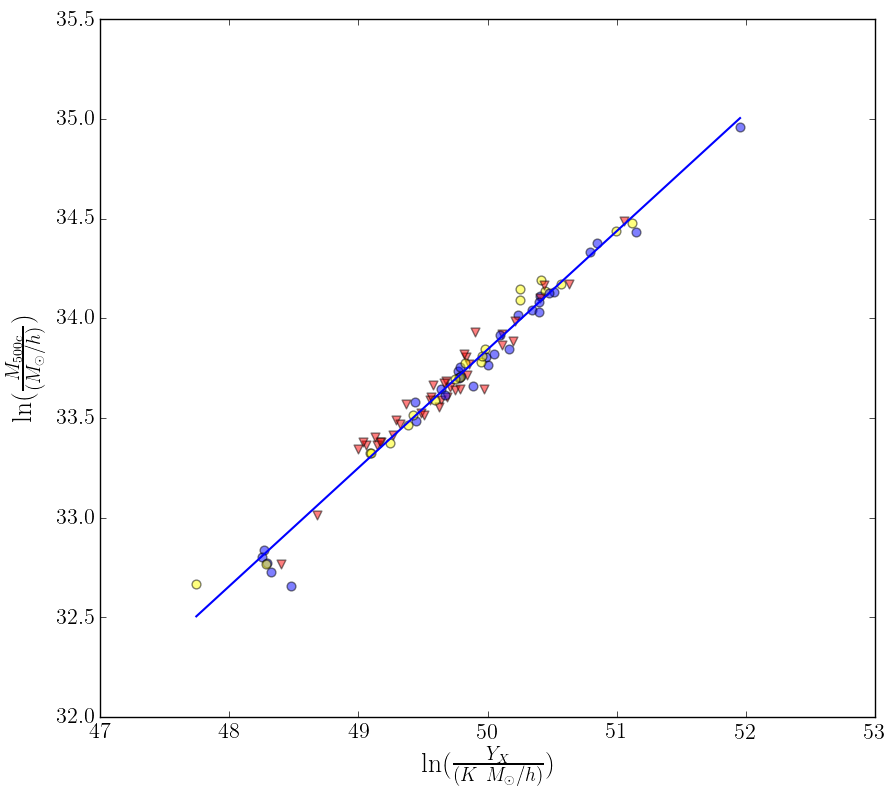

In [85]:
y=np.log(outM500c_92)
x=np.log(Txbulk_92*outMgas500c_92)
ylabel=r'${\rm ln} (\frac{M_{500c}}{(M_\odot/h)})$'
xlabel=r'${\rm ln}(\frac{Y_X}{(K \ M_\odot/h)})$'
dYx=plot_obs(x,y,xlabel,ylabel,savefig='Yx_M500c_AGN.png',retDeltay=True)

0.00330796752101 -0.00773959466733
starting sampling with 3 active parameters of the total 3 parameters
nchain = 500; tcorr = 7.57e+00
('R_GR = ', array([ 1.05579796,  1.06198639,  1.00788763]))
nchain = 1000; tcorr = 3.07e+01
('R_GR = ', array([ 1.03600984,  1.03708674,  1.00398764]))
nchain = 1500; tcorr = 2.99e+01
('R_GR = ', array([ 1.02238191,  1.02430043,  1.00272222]))
nchain = 2000; tcorr = 2.90e+01
('R_GR = ', array([ 1.01852507,  1.01950675,  1.00206502]))
nchain = 2500; tcorr = 2.87e+01
('R_GR = ', array([ 1.01513008,  1.01581476,  1.00171991]))
nchain = 3000; tcorr = 2.85e+01
('R_GR = ', array([ 1.01256703,  1.01344122,  1.00144101]))
nchain = 3500; tcorr = 2.84e+01
('R_GR = ', array([ 1.01121313,  1.01110488,  1.00130941]))
nchain = 4000; tcorr = 2.81e+01
('R_GR = ', array([ 1.01000238,  1.00956656,  1.00116567]))
nchain = 4500; tcorr = 2.80e+01
('R_GR = ', array([ 1.0088629 ,  1.00878586,  1.001062  ]))
MCMC sampler generated 450000 samples using 100 walkers
with step acc

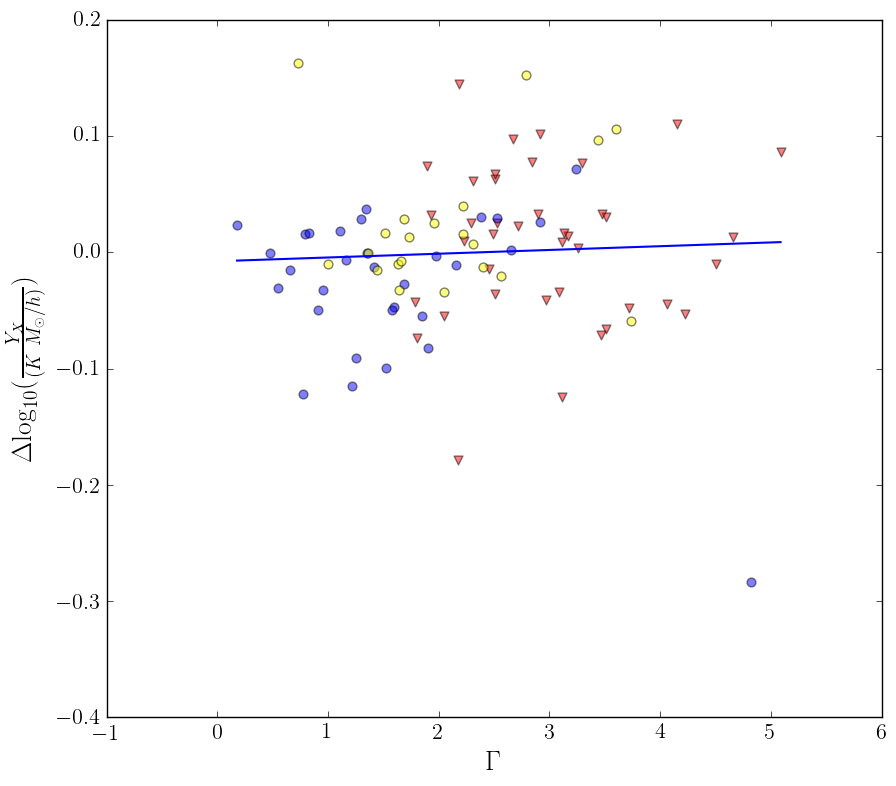

array([-0.04328761,  0.02479725, -0.02494005, -0.00911523, -0.00724568,
       -0.04098445, -0.03667589, -0.03002737, -0.00250991, -0.01441287,
        0.03362132,  0.01557106,  0.14550715,  0.10191669,  0.15124334,
        0.02467759,  0.02931759,  0.02676145, -0.05927882,  0.07395624,
       -0.06935476, -0.00988259,  0.03243823,  0.02207944, -0.04412875,
       -0.017311  ,  0.00664919,  0.01034193,  0.0059021 , -0.01244018,
       -0.07426313,  0.03100535,  0.10424989,  0.0310432 ,  0.03077003,
       -0.08081027,  0.03125088, -0.05389973,  0.02140603,  0.02068658,
       -0.03665861, -0.02477227,  0.06241381,  0.01528598,  0.06732709,
        0.01131606, -0.00179385, -0.01001119,  0.09646737, -0.08727652,
       -0.04508399, -0.09680966, -0.05021018, -0.12714249,  0.10012658,
       -0.02099994, -0.03341971,  0.04074684,  0.01411072,  0.06164126,
       -0.00480996,  0.00097237, -0.07178121, -0.04738509,  0.07745494,
        0.07607426,  0.0217149 ,  0.06867992,  0.00700827,  0.09

In [86]:
# x=Gamma[Gamma>0]
# y=dYx
# xlabel=r'$\Gamma$'
# ylabel=r'${\Delta\rm log}_{10}(\frac{Y_X}{(K \ M_\odot/h)})$'
# plot_obs(x,y,xlabel,ylabel,savefig='DYx_M500c_AGN.png',retDeltay=True)

1.58584213034 5.09521409497
starting sampling with 3 active parameters of the total 3 parameters
nchain = 500; tcorr = 1.57e+01
('R_GR = ', array([ 0.71149958,  1.08731291,  1.00516241]))
nchain = 1000; tcorr = 1.62e+01
('R_GR = ', array([ 1.09338629,  1.03328941,  1.0030227 ]))
nchain = 1500; tcorr = 1.58e+01
('R_GR = ', array([ 1.03717736,  1.02119179,  1.00230937]))
nchain = 2000; tcorr = 6.61e+01
('R_GR = ', array([ 1.02430913,  1.01635357,  1.00227499]))
nchain = 2500; tcorr = 6.38e+01
('R_GR = ', array([ 1.0195282 ,  1.01441326,  1.00190546]))
nchain = 3000; tcorr = 6.34e+01
('R_GR = ', array([ 1.01503005,  1.01176249,  1.00173349]))
nchain = 3500; tcorr = 6.26e+01
('R_GR = ', array([ 1.01255719,  1.01028534,  1.00155221]))
nchain = 4000; tcorr = 6.16e+01
('R_GR = ', array([ 1.0096302 ,  1.00804088,  1.00140381]))
MCMC sampler generated 400000 samples using 100 walkers
with step acceptance ratio of 0.562
[1 1 1]
mean, median = 1.580, 1.581, st.dev=0.0620
68perc interval = 1.520, 

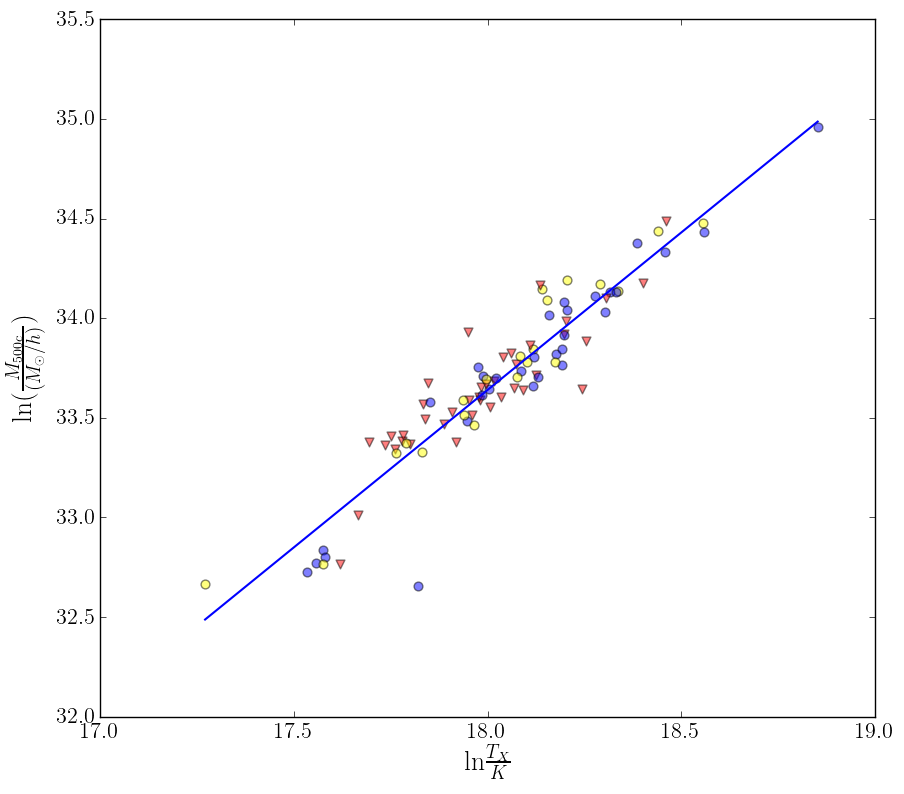

In [87]:
y=np.log(outM500c_92)
x=np.log(Txbulk_92)
ylabel=r'${\rm ln} (\frac{M_{500c}}{(M_\odot/h)})$'
xlabel=r'${\rm ln} \frac{T_{X}}{K}$'
dMTx=plot_obs(x,y,xlabel,ylabel,savefig='Tx_M500c_AGN.png',retDeltay=True)

0.907091951699 4.92708419467
starting sampling with 3 active parameters of the total 3 parameters
nchain = 500; tcorr = 1.46e+01
('R_GR = ', array([ 0.97273507,  1.08408243,  1.00429999]))
nchain = 1000; tcorr = 1.47e+01
('R_GR = ', array([ 0.98021298,  1.03854346,  1.00200648]))
nchain = 1500; tcorr = 1.44e+01
('R_GR = ', array([ 0.98194218,  1.02372259,  1.0012897 ]))
nchain = 2000; tcorr = 5.91e+01
('R_GR = ', array([ 0.98068445,  1.01781494,  1.00098102]))
nchain = 2500; tcorr = 5.75e+01
('R_GR = ', array([ 0.97904818,  1.0135795 ,  1.00078397]))
nchain = 3000; tcorr = 5.76e+01
('R_GR = ', array([ 0.97461659,  1.01180895,  1.00065748]))
nchain = 3500; tcorr = 5.65e+01
('R_GR = ', array([ 0.97200889,  1.00863037,  1.00056759]))
nchain = 4000; tcorr = 5.56e+01
('R_GR = ', array([ 0.95836308,  1.0075821 ,  1.00049914]))
nchain = 4500; tcorr = 5.58e+01
('R_GR = ', array([ 0.91377619,  1.00685331,  1.00045281]))
nchain = 5000; tcorr = 5.52e+01
('R_GR = ', array([ 1.80448672,  1.0059222 

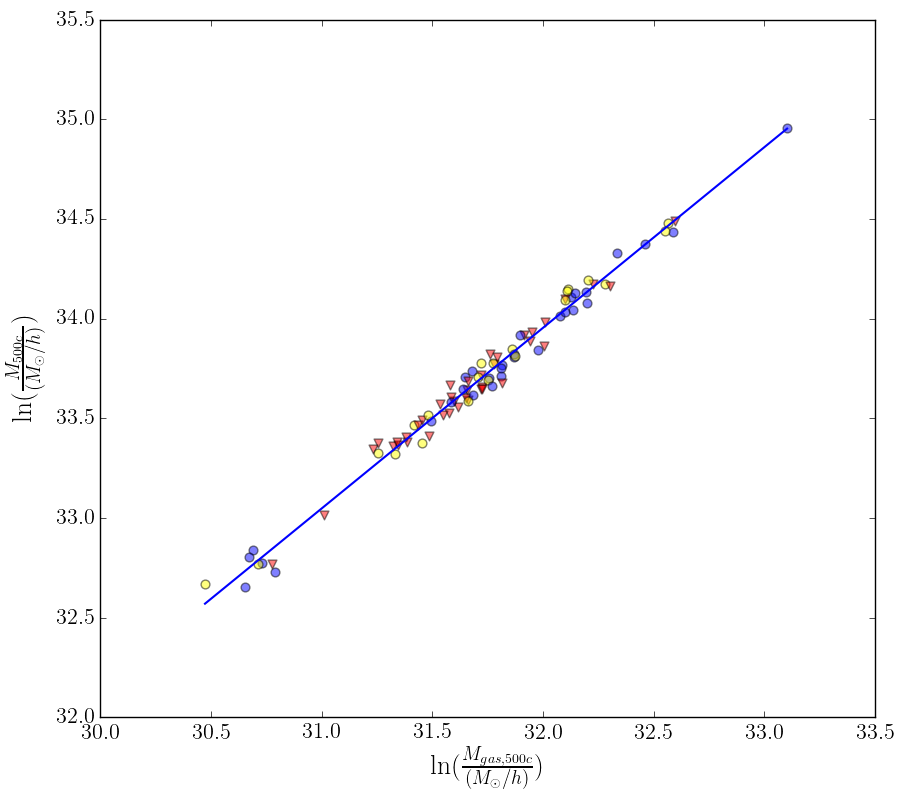

In [88]:
y=np.log(outM500c_92)
x=np.log(outMgas500c_92)
ylabel=r'${\rm ln} (\frac{M_{500c}}{(M_\odot/h)})$'
xlabel=r'${\rm ln} (\frac{M_{gas,500c}}{(M_\odot/h)})$'
dMMg=plot_obs(x,y,xlabel,ylabel,savefig='Mg_M500c_AGN.png',retDeltay=True)

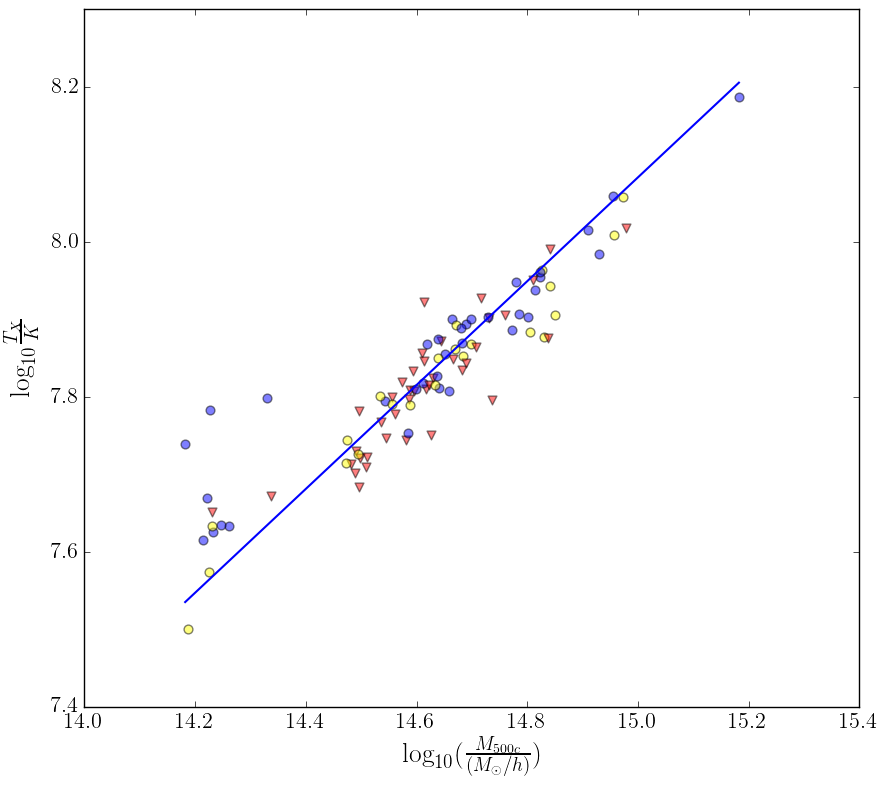

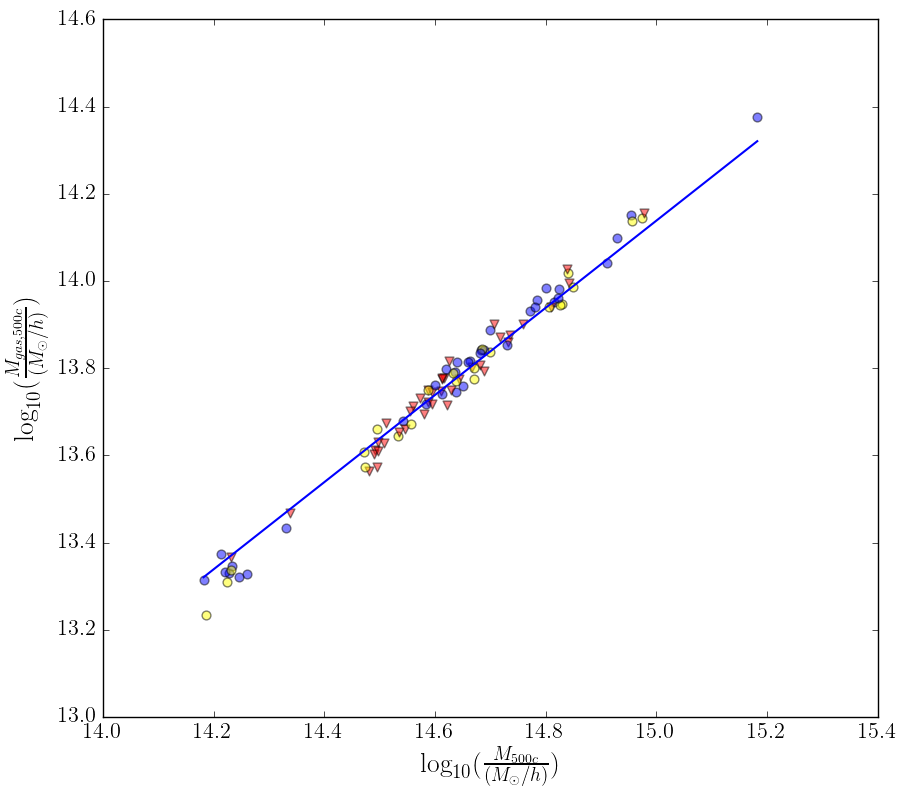

In [206]:
x=np.log10(np.array(outM500c))
y=np.log10(np.array(Txbulk))
xlabel=r'${\rm log}_{10} (\frac{M_{500c}}{(M_\odot/h)})$'
ylabel=r'${\rm log}_{10}\frac{T_{X}}{K}$'
dTx_fs=plot_obs(x,y,xlabel,ylabel,fixedslope=0.67,savefig='Tx_M500c_AGN.png',retDeltay=True)
x=np.log10(np.array(outM500c))
y=np.log10(np.array(outMgas500c))
xlabel=r'${\rm log}_{10} (\frac{M_{500c}}{(M_\odot/h)})$'
ylabel=r'${\rm log}_{10}(\frac{M_{gas,500c}}{(M_\odot/h)})$'
dMg_fs=plot_obs(x,y,xlabel,ylabel,fixedslope=1,savefig='Mg_M500c_AGN.png',retDeltay=True)

In [203]:

def mcmc_sample(x, nparams=2, nwalkers=100, nRval=100, modelpdf = None, 
               ipar_active = None, params=[], nsteps=1000000000, Rlim = 1.001):
    """
    MCMC sampler implementing the Goodman & Weare (2010) affine-invariant algorithm
    inner loop is vectorized
    
    run for nsteps or until R_GR=Rlim is reached, whichever comes first
    
    """
    
    try:
        import acor
    except:
        raise Exception("acor package is not installed! do: pip install acor")
        
    # parameters used to draw random number with the GW10 proposal distribution
    ap = 2.0; api = 1.0/ap; asqri=1.0/np.sqrt(ap); afact=(ap-1.0)

    # calculate effective number of parameters if some are specified to be fixed
    ia = (ipar_active==1)
    npareff = np.size(ipar_active[ia])
    print(("starting sampling with %d active parameters of the total %d parameters"%(npareff, nparams)))
    
    # initialize some auxiliary arrays and variables 
    chain = []; Rval = []; 

    naccept = 0; ntry = 0; nchain = 0
    mw = np.zeros((nwalkers,npareff)); sw = np.zeros((nwalkers,npareff))
    m = np.zeros(npareff); Wgr = np.zeros(npareff); Bgr = np.zeros(npareff); Rgr = np.zeros(npareff)
    
    mutx = []; taux = []
    for i in range(npareff): 
        mutx.append([]); taux.append([])
        Rval.append([])

    gxo = np.zeros((2,nwalkers/2))
    gxo[0,:] = modelpdf(x[0,:,:], params); gxo[1,:] = modelpdf(x[1,:,:], params)
    converged = False;
    while not converged:
        # for parallelization (not implemented here but the MPI version is available)
        # the walkers are split into two complementary sub-groups (see GW10)
        for kd in range(2):
            k = abs(kd-1)
            # vectorized inner loop of walkers stretch move in the Goodman & Weare sampling algorithm
            xchunk = x[k,:,:]
            jcompl = np.random.randint(0,nwalkers/2,nwalkers/2)
            xcompl = x[kd,jcompl,:]
            gxold  = gxo[k,:]
            zf= np.random.rand(nwalkers/2)   # the next few steps implement Goodman & Weare sampling algorithm
            zf = zf * afact; zr = (1.0+zf)*(1.0+zf)*api
            zrtile = np.transpose(np.tile(zr,(nparams,1))) # duplicate zr for nparams
            xtry  = xcompl + zrtile*(xchunk-xcompl)
            gxtry = modelpdf(xtry, params); gx    = gxold 
            gr   = gxtry - gx
            iacc = np.where(gr>0.)
            xchunk[iacc] = xtry[iacc]
            gxold[iacc] = gxtry[iacc]
            aprob = (npareff-1)*np.log(zr) + (gxtry - gx)
            u = np.random.uniform(0.0,1.0,np.shape(xchunk)[0])        
            iprob = np.where(aprob>np.log(u))
            xchunk[iprob] = xtry[iprob]
            gxold[iprob] = gxtry[iprob]
            naccept += len(iprob[0])

            x[k,:,ia] = np.transpose(xchunk[:,ia])
            gxo[k,:] = gxold        
            xdum = x[:,:,ia]

            for i in range(nwalkers/2):
                chain.append(np.array(xdum[k,i,:]))

            for i in range(nwalkers/2):
                mw[k*nwalkers/2+i,:] += xdum[k,i,:]
                sw[k*nwalkers/2+i,:] += xdum[k,i,:]**2
                ntry += 1

        nchain += 1
        
        # compute means for the auto-correlation time estimate
        for i in range(npareff):
            mutx[i].append(np.sum(xdum[:,:,i])/(nwalkers))

        # compute Gelman-Rubin indicator for all parameters
        if ( nchain%nRval == 0):
            # calculate Gelman & Rubin convergence indicator
            mwc = mw/(nchain-1.0)
            swc = sw/(nchain-1.0)-np.power(mwc,2)

            for i in range(npareff):
                # within chain variance
                Wgr[i] = np.sum(swc[:,i])/nwalkers
                # mean of the means over Nwalkers
                m[i] = np.sum(mwc[:,i])/nwalkers
                # between chain variance
                Bgr[i] = nchain*np.sum(np.power(mwc[:,i]-m[i],2))/(nwalkers-1.0)
                # Gelman-Rubin R factor
                Rgr[i] = (1.0 - 1.0/nchain + Bgr[i]/Wgr[i]/nchain)*(nwalkers+1.0)/nwalkers - (nchain-1.0)/(nchain*nwalkers)
                tacorx = acor.acor(np.abs(mutx[i]))[0]; taux[i].append(np.max(tacorx))
                Rval[i].append(Rgr[i]-1.0)

            print(("nchain = %d; tcorr = %.2e"%(nchain, np.max(tacorx))))
            print(("R_GR = ", Rgr))
            if (np.max(np.abs(Rgr-1.0)) < np.abs(Rlim-1.0)) or (nchain >= nsteps): converged = True
        
    print(("MCMC sampler generated %d samples using %d walkers"%(ntry, nwalkers)))
    print(("with step acceptance ratio of %.3f"%(1.0*naccept/ntry)))
        
    # record integer auto-correlation time at the final iteration
    nthin = int(tacorx)
    return chain, Rval, nthin

def mcmc_sample_init(nparams=2, nwalkers=100, x0=None, step=None, ipar_active=None):
    """
    distribute initial positions of walkers in an isotropic Gaussian around the initial point
    """
    np.random.seed()
    
    # in this implementation the walkers are split into 2 subgroups and thus nwalkers must be divisible by 2
    if nwalkers%2:
        raise ValueError("MCMCsample_init: nwalkers must be divisible by 2!")
         
    x = np.zeros([2,nwalkers/2,nparams])

    for i in range(nparams):
        x[:,:,i] = np.reshape(np.random.normal(x0[i],step[i],nwalkers),(2,nwalkers/2))
    ina = (ipar_active==0)
    if np.size(ina) > 0:
        x[:,:,ina] = x0[ina]
    return x

from mcmc import mcmc_sample, mcmc_sample_init
cmin = -100; cmax = 100 # flat prior range on normalization
smin = 0.; smax = 2. # flat prior range on scatter
# normalization factor; 0.5 is from the normalization by the integral int^{infty}_{-infty} dm/(1+m^2)^{3/2}

normfact = 0.5/(smax - smin)/(cmax - cmin)

def prior(xd):
    """
    defines parameter priors
    
    Parameters
    ----------
    xd : numpy 1d array
        xd[0] = slope; xd[1] = normalization; xd[2] = scatter
        
    Returns
    -------
    numpy float
        ln(prior)
        
    """
    if cmin <= xd[1] and xd[1] < cmax and smin <= xd[2] and xd[2] < smax:
        return np.log(normfact/(1. + xd[0]**2)**1.5)
    else:
        return -100.

def line_fit_vert_like (x, params=None): 
    """
    likelihood for a linear model for data with error bars in both directions 
    and intrinsic scatter in y direction
    the merit function is also in y-direction (see d'Agostino 2005)
    Thus, this likelihood will resolve in different results when fit as y(x) or x(y)
    
    Parameters
    -----------
    x : vector of parameters: 
    x[0] : slope m; x[1] = intercept c; x[2]=intrinsic scatter
    params : [x, y, c00, c01, c11]            
    
    Returns
    -------
    numpy array
        likelihood values for each walker
    """
    p = params; nw = np.shape(x)[0]; res = np.zeros(nw)
    for i in range(nw):
        dummy = x[i,2] + p[4] + x[i,0]**2*p[2]
        res[i] = -0.5*(np.sum(np.log(dummy))+np.sum((p[1]-x[i,0]*p[0]-x[i,1])**2/dummy)) \
                + prior(x[i,:])
    return res

def line_fit_like(x, params=None):
    """
    likelihood describing model with Gaussian distribution perpendicular to the mean
    linear relation and data points with correlated Gaussian uncertainties in both x and y
    This likelihood should return identical results for fits of y(x) and 
    
    Parameters
    ----------
    x: numpy vector
     x[0] = slope; x[1] = normalization; x[2] = variance in the perp direction
    params: numpy vector
     params = [x, y, c00, c01, c11] 
     
    Returns
    -------
    numpy array
        likelihood values for each walker
        
    """
    p = params; nw = np.shape(x)[0]; res = np.zeros(nw)
    
    for i in range(nw):
        m2 = x[i,0] * x[i,0]
        r = 1. + m2
        sigtot2  = x[i,2]*r + p[2]*m2 - 2.*p[3]*x[i,0] + p[4]
        d2 = (p[1] - x[i,0]*p[0] - x[i,1])**2 # y-mx-s
        siginv1 = r / (2.0*np.pi*sigtot2)
        res[i] = np.sum(0.5*(np.log(siginv1) - d2/sigtot2)) + \
                        prior(x[i,:])

    return res

def mcmc_fit(x, y, ex, ey, pini=None, ipar_active=None, nwalkers=None, modelpdf=None):
    # covariance matrix of errors
    c00 = ex*ex; c01 = 0.; c11 = ey*ey
    p = pini; params = [x, y, c00, c01, c11]
    nparams = 3
    x0 = np.array(p[0:nparams]); step = 0.1*np.array(np.abs(p[0:nparams]));
    iz = (step == 0); step[iz] = 0.01 
    # define which parameters are active (=1), and which should stay fixed (=0)
    
    # initialize MCMC walkers
    xwalk = mcmc_sample_init(nparams=nparams, nwalkers=nwalkers, x0=x0, step=step, ipar_active=ipar_active)
    
    # run the sampler
    nRval = 500 # record Gelman-Rubin R indicator each nRval'th step
    # now get the chain and how many values to thin based on the final auto-correlation time
    chain, Rval, nthin = mcmc_sample(xwalk, nparams=nparams, nwalkers=nwalkers, nRval=nRval, 
                                    modelpdf=modelpdf, Rlim = 1.01, params=params, ipar_active=ipar_active)
    print chain
    return chain, Rval, nthin

def pstats(x):
    """
    print chain mean, median, and confidence intervals
    """
    xmed = np.median(x); xm = np.mean(x); xsd = np.std(x)
    xcfl11 = np.percentile(x,16); xcfl12 = np.percentile(x,84)
    xcfl21 = np.percentile(x,2.5); xcfl22 = np.percentile(x,97.5)
    dashedline = '----------------------------------------------'
    print('mean, median = %.3f, %.3f, st.dev=%.4f'%(xm, xmed, xsd))
    print('68perc interval = %.3f, %.3f'%(xcfl11,xcfl12))
    print('95perc interval = %.3f, %.3f'%(xcfl21,xcfl22))
    print('%s'%dashedline)
    
def run_fit(x, ex, y, ey, nwalkers=100, m0=None, c0=None, s0= None, 
            ipar_active=None, modelpdf=line_fit_like):
    """
    run MCMC sampling of the posterior and extract fit parameters from the chain
    """

    chain, Rval, nthin = mcmc_fit(x, y, ex, ey, pini=[m0, c0, s0], 
                                  ipar_active=ipar_active, nwalkers=nwalkers, 
                                  modelpdf=modelpdf)

    nburn = int(20*nwalkers*nthin)

    m = zip(*chain)[0]; c = zip(*chain)[1]; s = np.sqrt(zip(*chain)[2])
    mc = m[nburn:]; cc = c[nburn:]; sc = s[nburn:]
    return mc, cc, sc

def plot_2d_dist(x, y, xlim, ylim, nxbins, nybins, weights=None, xlabel='x', ylabel='y', 
                 clevs=None, smooth=None, fig_setup=None, savefig=None):
    """
    routine to grid and plot a 2d histogram representing distribution of points with input coordinates x and y
    along with contour levels enclosing a given percentage of points specified as input. 
    
    x, y = float numpy arrays with input x and y positions of the points
    nxbins, nybins = int number of histogram bins in x and y directions
    weights = float weights to use for different points in the histogram
    xlabel, ylabel = string labels for x and y axis
    clevs = float contour levels to plot
    smooth = Boolean optional smoothing with Wiener filter is applied if True
    fig_setup = optional, this variable can pass matplotlib axes to this routine, if it is used within another plotting environment
    savefig = string, if specified the figure is saved in a file given by the path in the string
    
    Authors: Andrey Kravtsov and Vadim Semenov
    """
    if fig_setup == None:
        fig, ax = plt.subplots(figsize=(2.5, 2.5))
        #ax = plt.add_subplot(1,1,1)
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)
        plt.xlim(xlim[0], xlim[1])
        plt.ylim(ylim[0], ylim[1])
    else:
        ax = fig_setup
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xlim(xlim); ax.set_ylim(ylim)
    
    if xlim[1] < 0.: ax.invert_xaxis()

    if weights == None: weights = np.ones_like(x)
    H, xbins, ybins = np.histogram2d(x, y, weights=weights, bins=(np.linspace(xlim[0], xlim[1], nxbins),np.linspace(ylim[0], ylim[1], nybins)))
    
    H = np.rot90(H); H = np.flipud(H); 
             
    X,Y = np.meshgrid(xbins,ybins) 
    if smooth != None:
        from scipy.signal import wiener
        H = wiener(H, mysize=2)

    H = H/np.sum(H)        
    Hmask = np.ma.masked_where(H==0,H)
    
    pcol = ax.pcolormesh(X,Y,(Hmask), vmin=1.e-4*np.max(Hmask), cmap=plt.cm.BuPu, norm = LogNorm(), linewidth=0., rasterized=True)
    pcol.set_edgecolor('face')

    if clevs != None:
        lvls = []
        for cld in clevs:  
            sig = opt.brentq( conf_interval, 0., 1., args=(H,cld) )   
            lvls.append(sig)
                   
        ax.contour(H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = lvls, 
                    norm = LogNorm(), extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]])
    if savefig:
        plt.savefig(savefig,bbox_inches='tight')
    if fig_setup == None:
        plt.show()
    return

clevs = (0.683, 0.955, 0.997) # standard contour levels

def plot_fit(m, c, s, mlim=None, clim=None, slim=None, p_stats = False):
    """
    plot posterior and some of its statistics
    
    """
    fig, ax = plt.subplots(1,2, figsize=(4.,2.))
    
    plt.tight_layout(); plt.rc('font',size=9)
    fig.subplots_adjust(hspace=1.7)

    plot_2d_dist(m, c, xlim=mlim, ylim=clim, nxbins=41, nybins=41, clevs=clevs[::-1], 
                 smooth=True, xlabel=r'$\mathrm{slope}$', ylabel=r'$\mathrm{normalization}$', fig_setup=ax[0])

    ax[1].yaxis.set_label_position('right')
    plot_2d_dist(m, s, xlim=mlim, ylim=slim, nxbins=41, nybins=41, clevs=clevs[::-1], smooth=True,
                 xlabel=r'$\mathrm{slope}$', ylabel=r'$\mathrm{scatter}$', fig_setup=ax[1])
    plt.show()
    if p_stats:
        print("%s"%"====== Bradford et al. BTFR sample perpendicular likelihood ======")
        print("%s"%"best fit slope:")
        pstats(m)
        print("%s"%"best fit normalization")
        pstats(c)
        print("%s"%"best fit scatter:")
        pstats(s)
        
    return

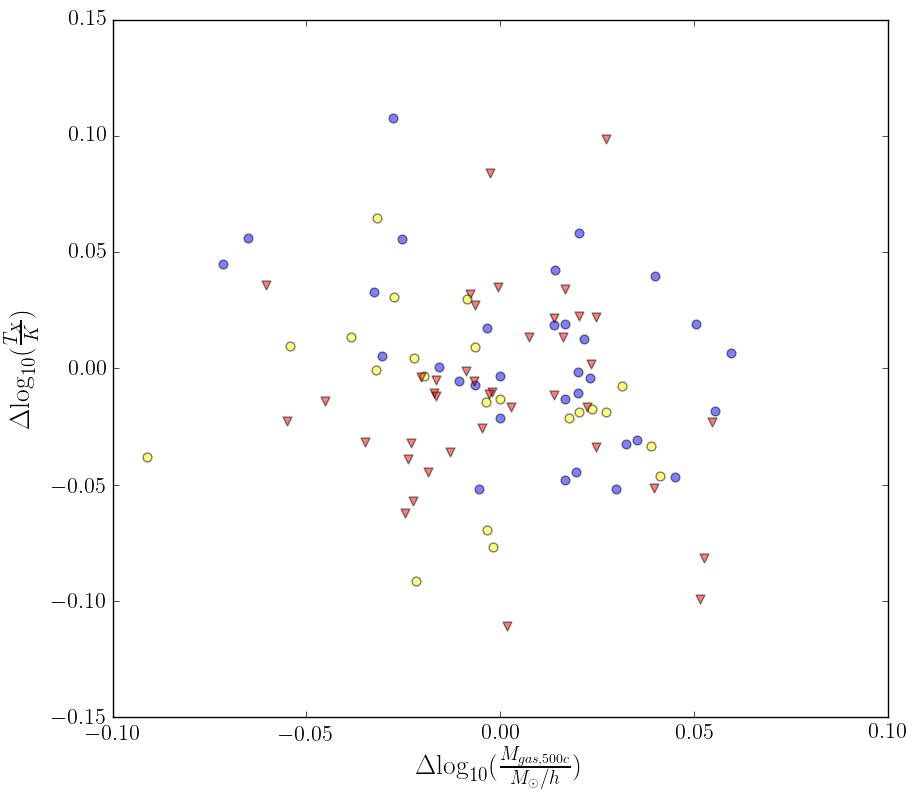

In [213]:
x=dMg_fs
y=dTx_fs

xlabel=r'$\Delta {\rm log}_{10} (\frac{M_{gas,500c}}{M_\odot/h})$'
ylabel=r'$\Delta {\rm log}_{10}(\frac{T_{X}}{K})$'
plot_obs(x,y,xlabel,ylabel,savefig='DMgfs_DTxfs_AGN.png',\
         xlim=[-0.1,0.1],ylim=[-0.15,0.15],plotbestfit=False)

1.49897378548 22.354832878


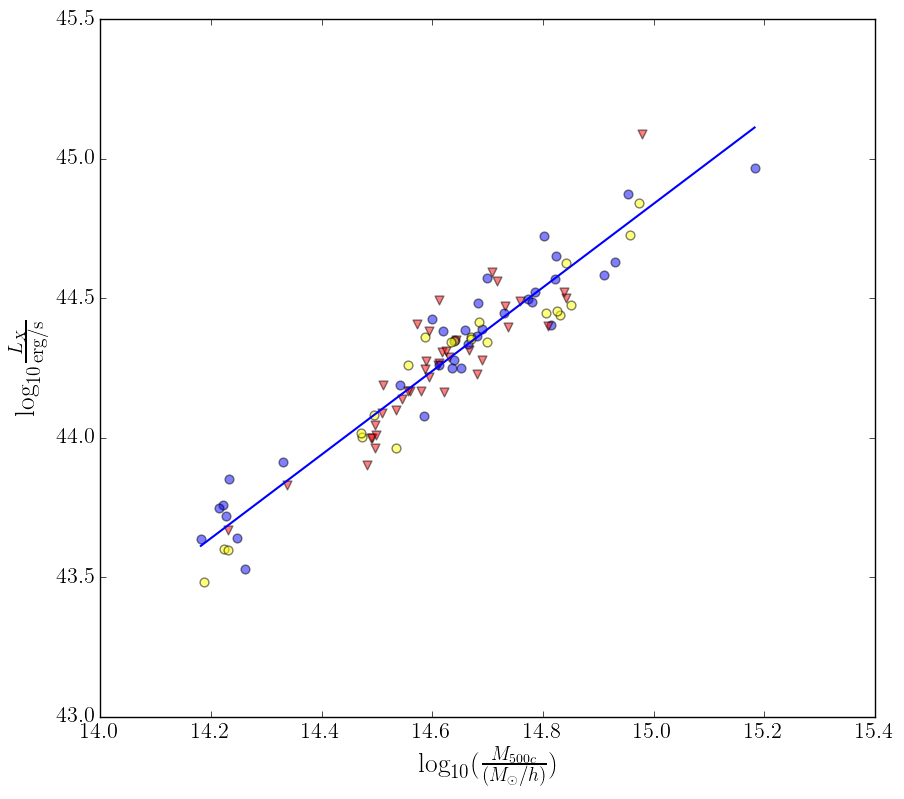

In [222]:
x=np.log10(np.array(outM500c))
y=np.log10(np.array(Lxbulk))
xlabel=r'${\rm log}_{10} (\frac{M_{500c}}{(M_\odot/h)})$'
ylabel=r'${\rm log}_{10}\frac{L_{X}}{\rm erg/s}$'
dLx=plot_obs(x,y,xlabel,ylabel,savefig='Lx_M500c_AGN.png',retDeltay=True)

-0.0131486788307 0.0287321932827


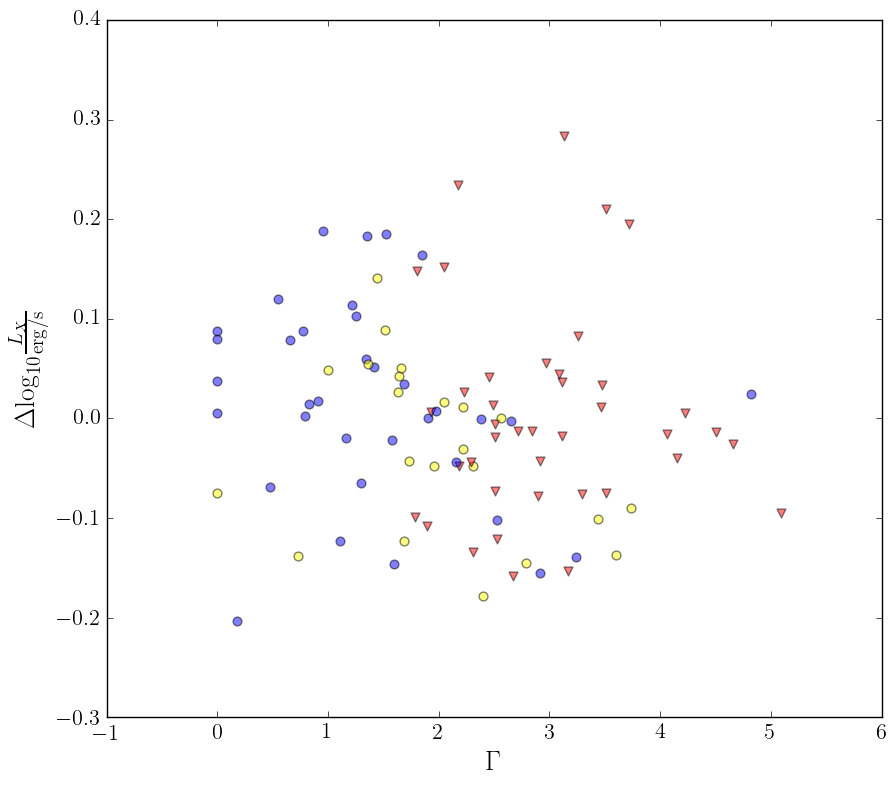

array([ 0.06554796, -0.11681989,  0.02853472,  0.04167943,  0.0194544 ,
       -0.10450925,  0.05688861,  0.05148613,  0.0358348 , -0.03325249,
        0.04482252,  0.00355113, -0.04910077, -0.04727281, -0.11831056,
       -0.13749611, -0.14502517, -0.09772038, -0.05767045,  0.03263875,
       -0.06128599,  0.22750006,  0.05833995, -0.07604569, -0.13661095,
       -0.15343722,  0.0173288 ,  0.04917683,  0.02728372,  0.00697636,
       -0.17546697,  0.02788935, -0.22939464, -0.01432609, -0.06830147,
        0.00256639, -0.00285308, -0.12985316,  0.14988036, -0.00558782,
        0.0088639 , -0.01547823,  0.05902933, -0.00142943,  0.09811485,
       -0.06840624,  0.01753296, -0.01407302, -0.1403773 ,  0.00508222,
       -0.04450735, -0.15187521,  0.0906914 ,  0.00128365,  0.17678422,
        0.00868995, -0.00536797, -0.03339921,  0.00574639,  0.01465745,
        0.04841689,  0.29569347, -0.13241645,  0.04321656, -0.10379141,
        0.09692785,  0.14259891, -0.0300345 , -0.05666588, -0.11

In [223]:
x=Gamma
y=dLx
xlabel=r'$\Gamma$'
ylabel=r'${\rm \Delta log}_{10}\frac{L_{X}}{\rm erg/s}$'
plot_obs(x,y,xlabel,ylabel,savefig='DLx_M500c_AGN.png',plotbestfit=False,retDeltay=True)